# Simple Linear Regression

## Import Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [5]:
df = pd.read_csv("Advertising.csv")

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


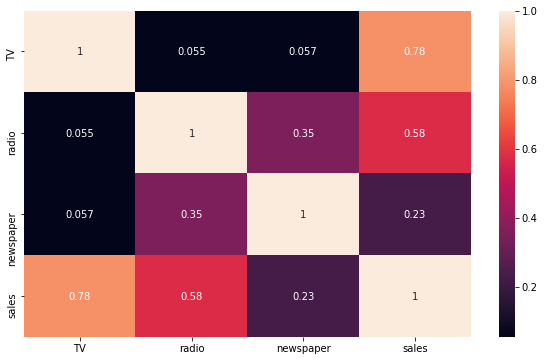

In [10]:
sns.heatmap(df.corr(),annot = True);

## Create new independent variable (feature)

In [11]:
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

In [12]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


## Which feature is more suitable for linear regression?

In [18]:
def check_dist(df, var):
    plt.subplot(1, 2, 1)
    sns.histplot(x=var, data=df)
    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.show()

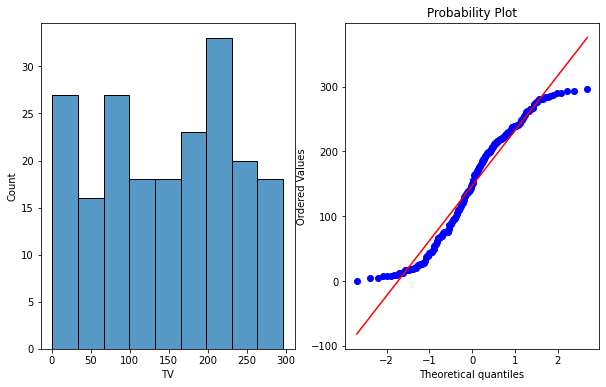

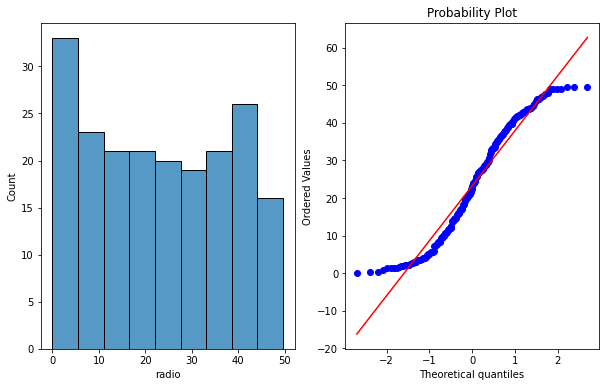

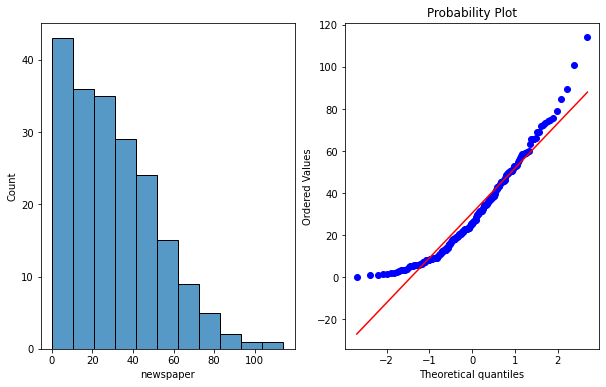

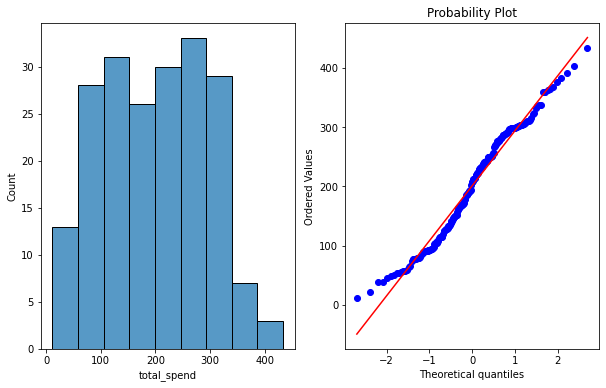

In [19]:
for col in df.drop("sales", axis = 1 ).columns:
    check_dist(df, col)

In [21]:
df = df[["total_spend","sales"]]
df.head()

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9


## Plotting the relationship between independent variable and dependent variable 

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

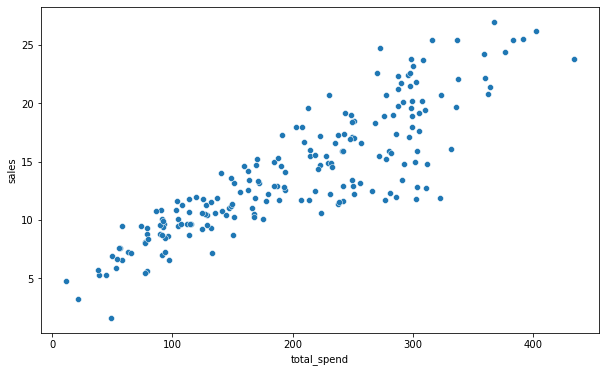

In [22]:
sns.scatterplot(x="total_spend", y = "sales", data = df)

## Correlation between independent variable and dependent variable

In [26]:
corr = df["sales"].corr(df["total_spend"])
corr

0.8677123027017423

## Coefficient of determination (R2)

In [27]:
R2_score = corr**2
R2_score 

0.75292464025996

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

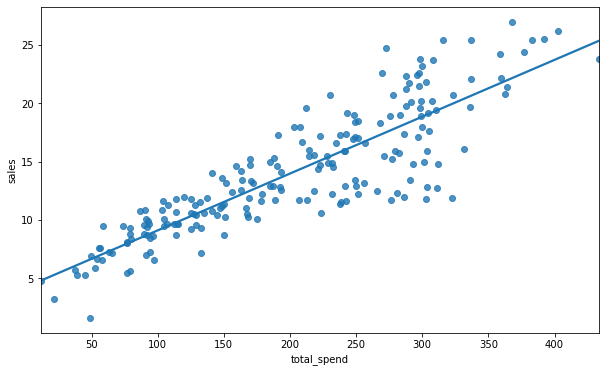

In [29]:
sns.regplot(data = df , x = "total_spend", y = "sales",ci = None)

## Splitting the dataset into X(independent variables) and y (dependent variable)

In [30]:
# y = b1X +b0

In [31]:
X = df["total_spend"]
y = df["sales"]

## Determination of coefficients (slope and intercept)

In [32]:
np.polyfit(X,y,deg=1) # 0. index b1 , 1. index b0

array([0.04868788, 4.24302822])

## Why do we use the least squares error method to find the regression line that best fits the data?

In [34]:
# en küçük kareler metodu

b1 = np.polyfit(X,y , deg = 1 )[0]

b0 = np.polyfit(X,y , deg = 1 )[1]

predict = b1*X + b0

In [35]:
values = {"actual": y , "predicted" : predict, "residual": y-predict, "LSE": (y-predict)**2 }

## Prediction with simple linear regression

## Improving predictions